Defaulting to user installation because normal site-packages is not writeable


C:\Users\Karthikeya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 80ms/step - accuracy: 0.3018 - loss: 1.9321
Epoch 2/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 76ms/step - accuracy: 0.4208 - loss: 1.6426
Epoch 3/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.4553 - loss: 1.5484
Epoch 4/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.4808 - loss: 1.4811
Epoch 5/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.4927 - loss: 1.4381
Epoch 6/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.5114 - loss: 1.3858
Epoch 7/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.5265 - loss: 1.3485
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5049 - loss: 1.4030
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
ANN Classification report is :                precision    recall  f1-score   support

           0       0.61      0.58      0.60      1000
           1       0.55      0.72      0.62      1000
           2       0.45      0.29      0.35      1000
   

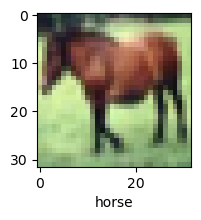

In [4]:
# importing required libraries for the program
!pip install tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras import datasets
from tensorflow.keras import layers,models
# download required dataset from te tensorflow
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape
# labelling the classes required for the dataset
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
# reshaping the data in the dataset from 2dimensional to 1dimensional array
y_train=y_train.reshape(-1, )
y_train[:5]
# function to plot the image from the dataset for the given index with the label
def plot_image(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])
plot_image(x_train,y_train,7)
# normalizing the pixels for the dataset
x_train= x_train/255
x_test=x_test/255
# building an Artificial Neural Network ANN
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(4000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=7)
ann.evaluate(x_test,y_test)
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('ANN Classification report is : ',classification_report(y_test,y_pred_classes))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 37ms/step - accuracy: 0.3385 - loss: 1.7696
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.5798 - loss: 1.1830
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.6547 - loss: 0.9902
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.6897 - loss: 0.8831
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7240 - loss: 0.7928
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.7454 - loss: 0.7206
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7685 - loss: 0.6658
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 151s 96ms/step - accuracy: 0.7836 - loss: 0.6110
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8017 - loss: 0.5652
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8190 - loss: 0.5170
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7091 - loss: 0.9027
313/313 ━━━━━━━━━━━━━━

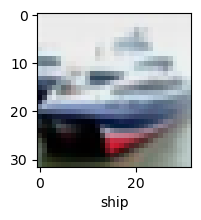

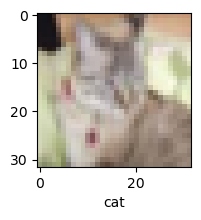

In [8]:
# building a Convolutional Neural Network for the given dataset
cnn=models.Sequential([
    # cnn layers
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    # dense layers for cnn
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=10)
cnn.evaluate(x_test,y_test)
# reshaping the y_test to flatten a shapped y_test
y_test=y_test.reshape(-1)
plot_image(x_test,y_test,1)
# predicting the outcome for CNN
y_pred=cnn.predict(x_test)
y_pred[:5]
y_classes=[np.argmax(element) for element in y_pred]
y_test[:5]
plot_image(x_test,y_test,8)
classes[y_classes[8]]
print("CNN classification report is: ",classification_report(y_test,y_classes))